In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import keras
import tensorflow

In [90]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
index = test.index

train_labels = train.label
train = train.drop(columns = "label")

# Preparing data for neural network

train = train.values.astype("float") / 255
test = test.values.astype("float") / 255

In [91]:
train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (42000, 784)
Test shape: (28000, 784)


### Sample images from train dataset

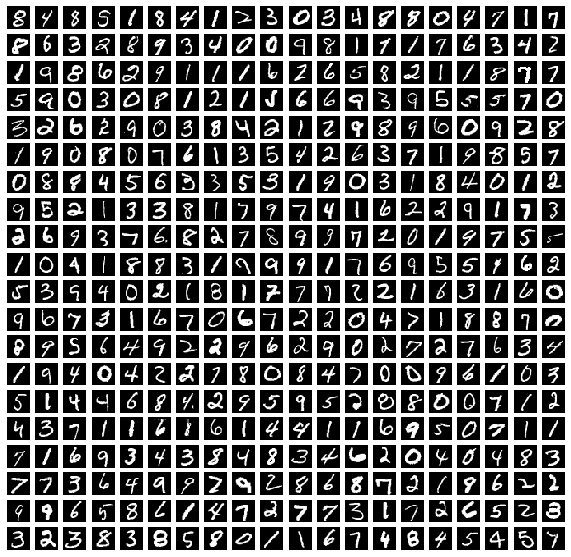

In [93]:
images = np.random.choice(train.shape[0], 400)
plt.figure(figsize = (10, 10))
for i in range(400):
    plt.subplot(20, 20, i + 1)
    plt.imshow(train[images[i]].reshape((28, 28)), cmap = "gray")
    plt.axis("off")

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size = 0.2, random_state = 42)

In [95]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [99]:
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation = "relu", input_shape = (28*28,)))
network.add(layers.Dense(256, activation = "relu"))
network.add(layers.Dense(10, activation = "softmax"))

network.compile(optimizer = "rmsprop",
               loss = "categorical_crossentropy",
               metrics = ["accuracy"])

In [106]:
network.fit(X_train, y_train, batch_size = 256, epochs = 10)

Epoch 1/10
132/132 [==============================] - 2s 11ms/step - loss: 6.8881e-04 - accuracy: 0.9999
Epoch 2/10
132/132 [==============================] - 1s 11ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 3/10
132/132 [==============================] - 1s 10ms/step - loss: 0.0010 - accuracy: 0.9998
Epoch 4/10
132/132 [==============================] - 1s 11ms/step - loss: 6.6738e-04 - accuracy: 0.9999
Epoch 5/10
132/132 [==============================] - 1s 10ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 6/10
132/132 [==============================] - 1s 10ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 7/10
132/132 [==============================] - 1s 10ms/step - loss: 3.1243e-06 - accuracy: 1.0000
Epoch 8/10
132/132 [==============================] - 1s 10ms/step - loss: 7.4367e-04 - accuracy: 0.9998
Epoch 9/10
132/132 [==============================] - 1s 9ms/step - loss: 2.4257e-04 - accuracy: 0.9999
Epoch 10/10
132/132 [==============================] - 1s 8ms/step - los

In [107]:
network.evaluate(X_test, y_test)

263/263 [==============================] - 1s 2ms/step - loss: 0.0528 - accuracy: 0.9919


[0.0528169684112072, 0.9919047355651855]

Accuracy score: 0.991904761904762
     0    1    2    3    4    5    6    7    8    9
0  810    0    0    0    0    1    3    1    0    1
1    0  906    1    0    0    0    0    1    1    0
2    0    1  840    1    1    0    0    0    2    1
3    0    0    0  926    0    6    0    2    2    1
4    1    0    0    0  825    1    1    0    0   11
5    0    0    0    2    0  697    1    0    1    1
6    0    1    0    0    0    2  780    0    2    0
7    0    0    1    1    2    1    0  884    0    4
8    0    1    1    1    0    2    1    2  826    1
9    0    0    0    0    0    0    0    0    0  838


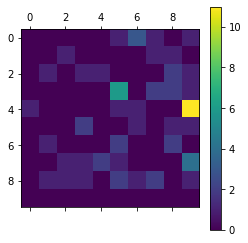

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = np.argmax(network.predict(X_test), axis = 1)

print("Accuracy score:", accuracy_score(np.argmax(y_test, axis = 1), y_test_pred))
conf_mx = pd.DataFrame(confusion_matrix(np.argmax(y_test, axis = 1), y_test_pred), index = np.arange(0, 10), columns = np.arange(0, 10))
print(conf_mx)
np.fill_diagonal(conf_mx.values, 0)

plt.matshow(conf_mx)
plt.colorbar()

### Implemented neural network has great test accuracy score but it make some mistakes. Let's see on which images. Some of this images are difficult to recognize by human eye.

Predicted number: 5
Real number: 8
Image:


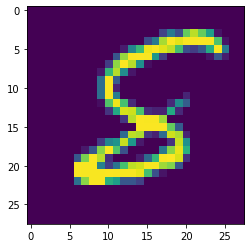

Predicted number: 9
Real number: 5
Image:


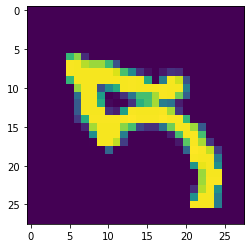

Predicted number: 8
Real number: 2
Image:


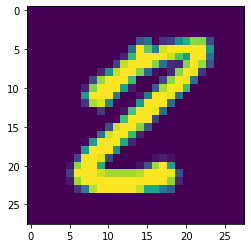

Predicted number: 4
Real number: 7
Image:


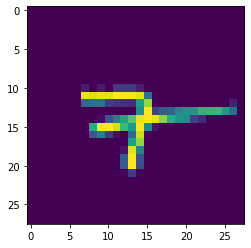

Predicted number: 9
Real number: 7
Image:


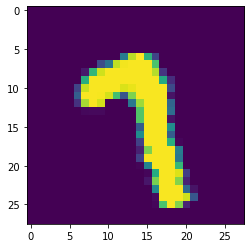

Predicted number: 5
Real number: 6
Image:


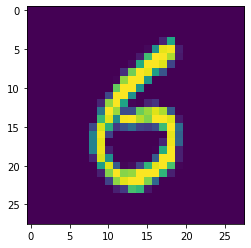

Predicted number: 9
Real number: 2
Image:


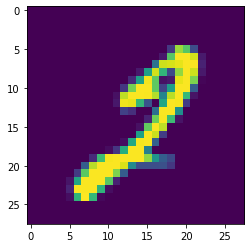

Predicted number: 6
Real number: 0
Image:


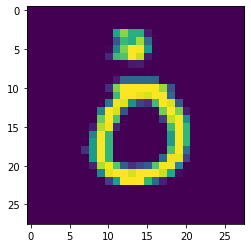

Predicted number: 4
Real number: 2
Image:


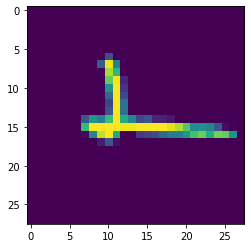

Predicted number: 9
Real number: 4
Image:


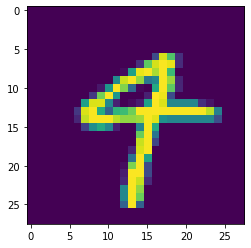

Predicted number: 2
Real number: 8
Image:


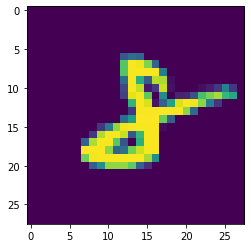

Predicted number: 9
Real number: 4
Image:


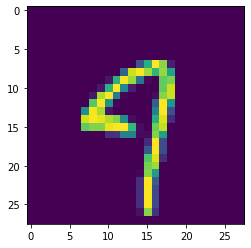

Predicted number: 7
Real number: 3
Image:


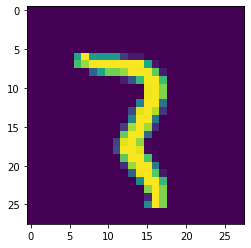

Predicted number: 8
Real number: 3
Image:


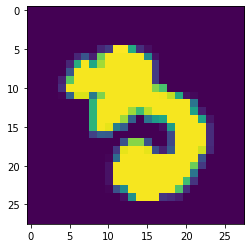

Predicted number: 7
Real number: 1
Image:


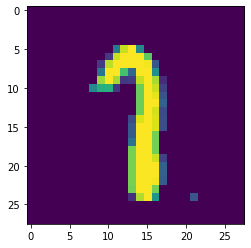

Predicted number: 9
Real number: 4
Image:


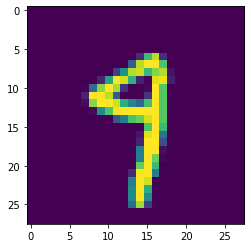

Predicted number: 7
Real number: 0
Image:


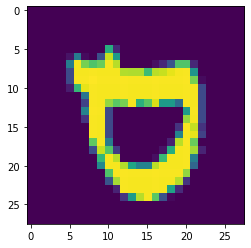

Predicted number: 9
Real number: 4
Image:


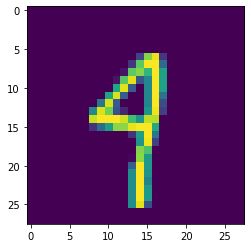

Predicted number: 3
Real number: 8
Image:


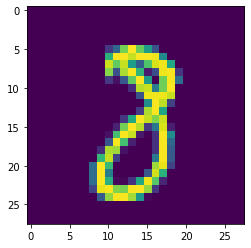

Predicted number: 9
Real number: 4
Image:


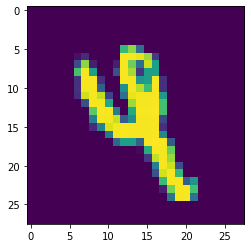

Predicted number: 3
Real number: 7
Image:


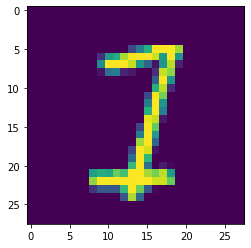

Predicted number: 5
Real number: 0
Image:


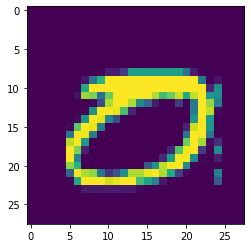

Predicted number: 5
Real number: 4
Image:


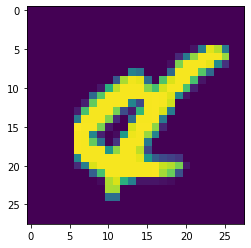

Predicted number: 4
Real number: 7
Image:


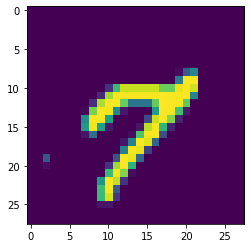

Predicted number: 8
Real number: 6
Image:


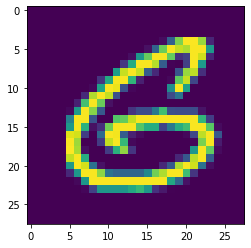

Predicted number: 9
Real number: 4
Image:


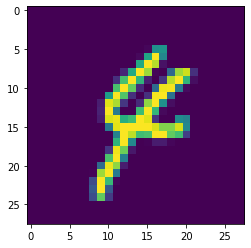

Predicted number: 9
Real number: 7
Image:


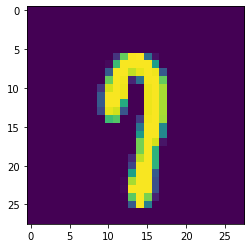

Predicted number: 9
Real number: 8
Image:


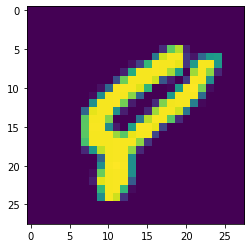

Predicted number: 5
Real number: 3
Image:


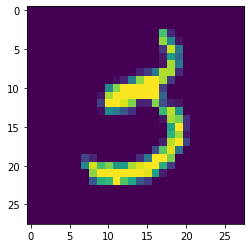

Predicted number: 7
Real number: 8
Image:


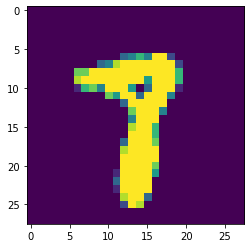

Predicted number: 2
Real number: 1
Image:


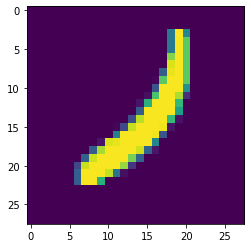

Predicted number: 5
Real number: 3
Image:


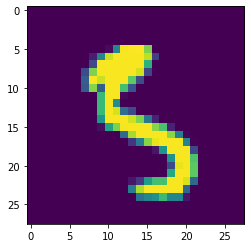

Predicted number: 0
Real number: 4
Image:


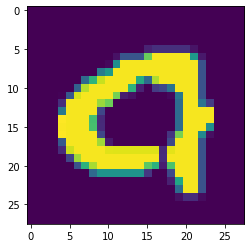

Predicted number: 5
Real number: 3
Image:


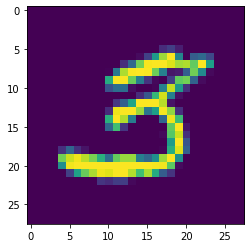

Predicted number: 8
Real number: 6
Image:


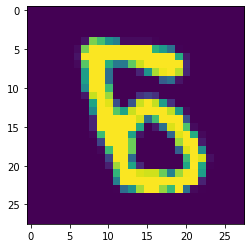

Predicted number: 5
Real number: 3
Image:


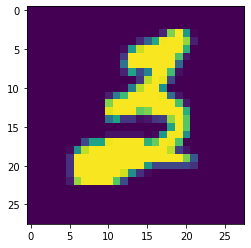

Predicted number: 9
Real number: 4
Image:


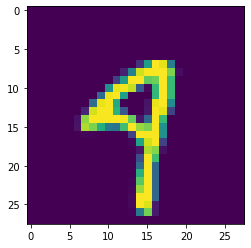

Predicted number: 5
Real number: 8
Image:


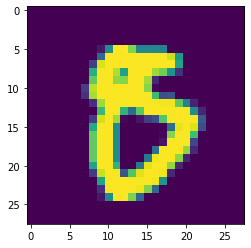

Predicted number: 2
Real number: 7
Image:


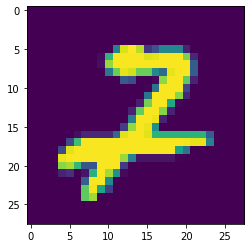

Predicted number: 1
Real number: 6
Image:


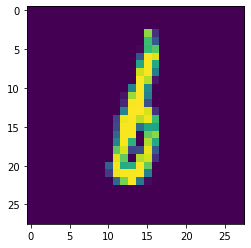

Predicted number: 5
Real number: 3
Image:


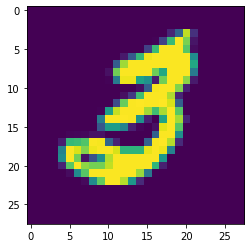

Predicted number: 9
Real number: 7
Image:


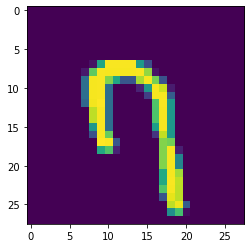

Predicted number: 3
Real number: 5
Image:


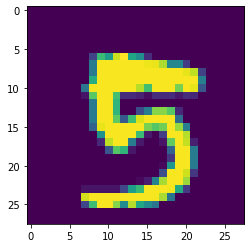

Predicted number: 3
Real number: 2
Image:


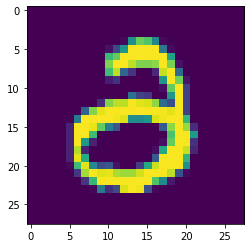

Predicted number: 1
Real number: 8
Image:


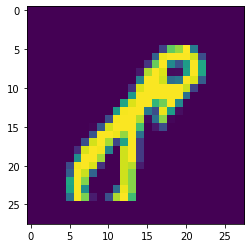

Predicted number: 8
Real number: 1
Image:


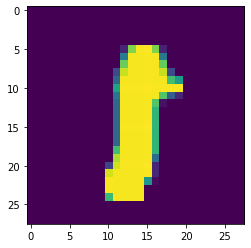

Predicted number: 6
Real number: 0
Image:


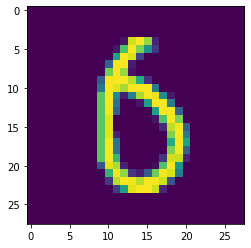

Predicted number: 7
Real number: 8
Image:


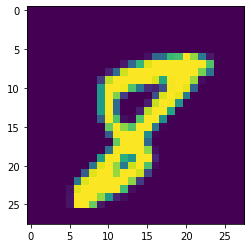

Predicted number: 9
Real number: 4
Image:


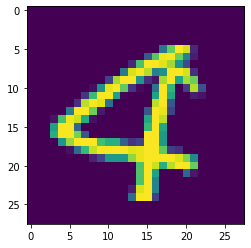

Predicted number: 6
Real number: 4
Image:


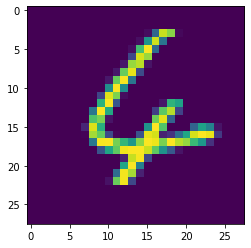

Predicted number: 9
Real number: 4
Image:


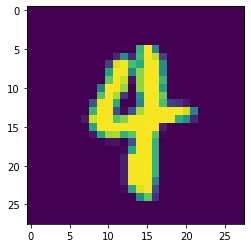

Predicted number: 9
Real number: 4
Image:


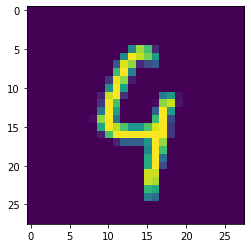

Predicted number: 5
Real number: 7
Image:


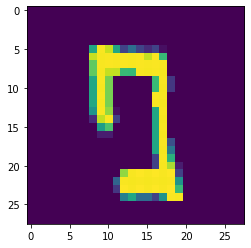

Predicted number: 9
Real number: 0
Image:


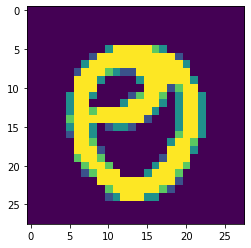

Predicted number: 3
Real number: 5
Image:


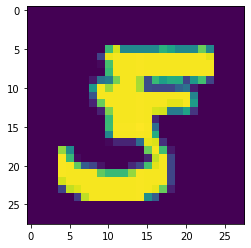

Predicted number: 6
Real number: 8
Image:


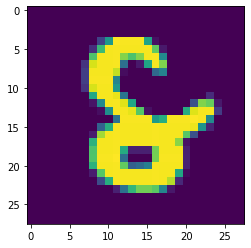

Predicted number: 5
Real number: 3
Image:


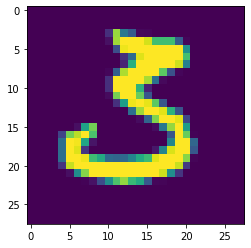

Predicted number: 9
Real number: 3
Image:


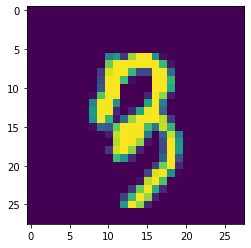

Predicted number: 5
Real number: 6
Image:


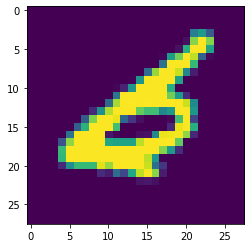

Predicted number: 9
Real number: 7
Image:


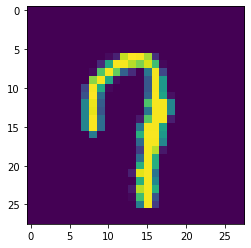

Predicted number: 8
Real number: 3
Image:


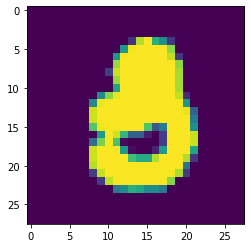

Predicted number: 1
Real number: 2
Image:


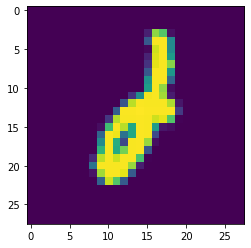

Predicted number: 9
Real number: 4
Image:


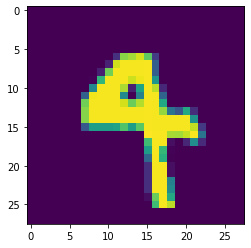

Predicted number: 7
Real number: 3
Image:


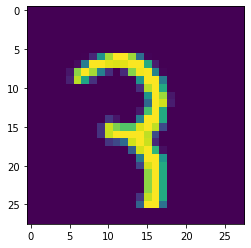

Predicted number: 6
Real number: 0
Image:


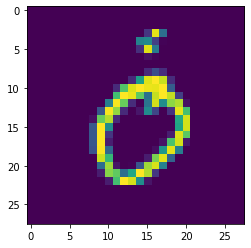

Predicted number: 8
Real number: 5
Image:


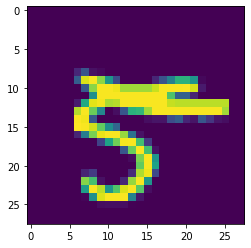

Predicted number: 8
Real number: 2
Image:


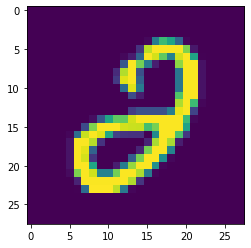

Predicted number: 6
Real number: 5
Image:


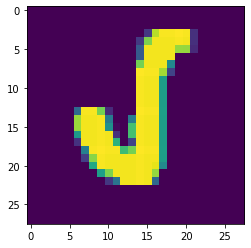

In [128]:
for i in range(np.sum([np.argmax(y_test, axis = 1) != y_test_pred])):
    print("Predicted number:", y_test_pred[(np.argmax(y_test, axis = 1) != y_test_pred)][i])
    print("Real number:", np.argmax(y_test, axis = 1)[(np.argmax(y_test, axis = 1) != y_test_pred)][i])
    print("Image:")
    plt.imshow(X_test[(np.argmax(y_test, axis = 1) != y_test_pred)][i].reshape(28, 28))
    plt.show()

In [118]:
network.fit(train, to_categorical(train_labels), batch_size = 256, epochs = 7)

Epoch 1/7
165/165 [==============================] - 2s 12ms/step - loss: 4.0888e-04 - accuracy: 0.9999
Epoch 2/7
165/165 [==============================] - 2s 10ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 3/7
165/165 [==============================] - 2s 12ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 4/7
165/165 [==============================] - 2s 12ms/step - loss: 5.8558e-04 - accuracy: 0.9999
Epoch 5/7
165/165 [==============================] - 2s 13ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 6/7
165/165 [==============================] - 2s 13ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 7/7
165/165 [==============================] - 2s 11ms/step - loss: 0.0012 - accuracy: 0.9997


In [119]:
test_pred = np.argmax(network.predict(test), axis = 1)

In [120]:
digit_submission = (pd.concat([pd.Series(range(len(index)), name = "ImageId") + 1, 
            pd.Series(test_pred, name = "Label")], axis = 1).set_index("ImageId"))

digit_submission

digit_submission.to_csv("digit_submission_nn.csv")